In [ ]:
import os
import sys
from pathlib import Path  # NOVO

current_dir = os.getcwd()
project_root = current_dir

while not os.path.isdir(os.path.join(project_root, "src")) and project_root != "/":
    project_root = os.path.dirname(project_root)

sys.path.append(project_root)
print("Project root:", project_root)

# NOVO: diretórios para salvar gráficos
PROJECT_ROOT = Path(project_root)
REPORTS_DIR = PROJECT_ROOT / "reports"
TRENDZ_DIR = PROJECT_ROOT / "trendz"

REPORTS_DIR.mkdir(exist_ok=True)
TRENDZ_DIR.mkdir(exist_ok=True)


Project root: /Users/guilhermealencar/ml-syphilis-congenita


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.data.load_data import load_csv
from src.data.preprocess import basic_cleaning

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve
)

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


In [35]:
# Ajuste o caminho se necessário
df = load_csv("../data/raw/data_set.csv")
attr = load_csv("../data/raw/attributes.csv")

print(f"Dataset principal: {df.shape[0]} linhas x {df.shape[1]} colunas")
print("Algumas linhas do dataset:")
display(df.head())

print("\nDicionário de atributos:")
display(attr.head())


[OK] Dataset carregado com 41762 linhas e 26 colunas.
[OK] Dataset carregado com 26 linhas e 4 colunas.
Dataset principal: 41762 linhas x 26 colunas
Algumas linhas do dataset:


,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,25.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,...,0.0,5.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,25.0
2,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,...,1.0,6.0,2.0,4.0,1.0,1.0,3.0,0.0,3.0,24.0
3,1.0,1.0,2.0,1.0,0.0,4.0,0.0,0.0,1.0,5.0,...,0.0,2.0,1.0,3.0,1.0,1.0,0.0,0.0,2.0,28.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,4.0,1.0,3.0,1.0,1.0,0.0,0.0,3.0,27.0



Dicionário de atributos:


,Attribute,Description,Type,Categorization
0,VDRL_RESULT,VDRL result,Binary,(i) Positive and (ii) Negative
1,CONS_ALCOHOL,Consume alcohol,Categorical,"(i) Positive, (ii) Negative,\nand (iii) Not in..."
2,RH_FACTOR,RH factor,Categorical,"(i) Positive, (ii) Negative,\nand (iii) Not in..."
3,SMOKER,Smoker,Categorical,"(i) Positive, (ii) Negative,\nand (iii) Not in..."
4,PLAN_PREGNANCY,Planned pregnancy,Categorical,"(i) Positive, (ii) Negative,\nand (iii) Not in..."


In [36]:
print("Tipos de dados:")
display(df.dtypes)

print("\nValores ausentes por coluna:")
display(df.isnull().sum())

print("\nEstatísticas descritivas (numéricas):")
display(df.describe())


Tipos de dados:


VDRL_RESULT          float64
CONS_ALCOHOL         float64
RH_FACTOR            float64
SMOKER               float64
PLAN_PREGNANCY       float64
BLOOD_GROUP          float64
HAS_PREG_RISK        float64
TET_VACCINE          float64
IS_HEAD_FAMILY       float64
MARITAL_STATUS       float64
FOOD_INSECURITY      float64
NUM_ABORTIONS        float64
NUM_LIV_CHILDREN     float64
NUM_PREGNANCIES      float64
FAM_PLANNING         float64
TYPE_HOUSE           float64
HAS_FAM_INCOME       float64
LEVEL_SCHOOLING      float64
CONN_SEWER_NET       float64
NUM_RES_HOUSEHOLD    float64
HAS_FRU_TREE         float64
HAS_VEG_GARDEN       float64
FAM_INCOME           float64
HOUSING_STATUS       float64
WATER_TREATMENT      float64
AGE                  float64
dtype: object


Valores ausentes por coluna:


VDRL_RESULT          0
CONS_ALCOHOL         0
RH_FACTOR            0
SMOKER               0
PLAN_PREGNANCY       0
BLOOD_GROUP          0
HAS_PREG_RISK        0
TET_VACCINE          0
IS_HEAD_FAMILY       0
MARITAL_STATUS       0
FOOD_INSECURITY      0
NUM_ABORTIONS        0
NUM_LIV_CHILDREN     0
NUM_PREGNANCIES      0
FAM_PLANNING         0
TYPE_HOUSE           0
HAS_FAM_INCOME       0
LEVEL_SCHOOLING      0
CONN_SEWER_NET       0
NUM_RES_HOUSEHOLD    0
HAS_FRU_TREE         0
HAS_VEG_GARDEN       0
FAM_INCOME           0
HOUSING_STATUS       0
WATER_TREATMENT      0
AGE                  0
dtype: int64


Estatísticas descritivas (numéricas):


,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
count,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,...,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000,41762.000000
mean,0.980221,1.068890,0.714789,1.040683,0.648700,1.810474,0.918299,0.164911,0.960251,2.380657,...,0.251449,4.459892,0.504621,3.269527,0.985393,1.072003,1.219913,0.720152,1.851755,25.191729
std,0.139241,0.353034,0.931219,0.331452,0.573161,1.676994,0.412945,0.475779,0.499563,2.284152,...,0.433851,1.732288,0.624362,0.983791,0.588661,0.494758,1.225242,0.936227,1.160388,4.561691
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000
25%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,4.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2.000000,25.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,5.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,2.000000,25.000000
75%,1.000000,1.000000,2.000000,1.000000,1.000000,4.000000,1.000000,0.000000,1.000000,5.000000,...,1.000000,5.000000,1.000000,4.000000,1.000000,1.000000,3.000000,1.000000,2.000000,25.000000
max,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,5.000000,...,1.000000,9.000000,2.000000,5.000000,2.000000,2.000000,3.000000,3.000000,4.000000,51.000000


Contagem absoluta:
VDRL_RESULT
1.0    40936
0.0      826
Name: count, dtype: int64

Proporção:
VDRL_RESULT
1.0    0.980221
0.0    0.019779
Name: proportion, dtype: float64


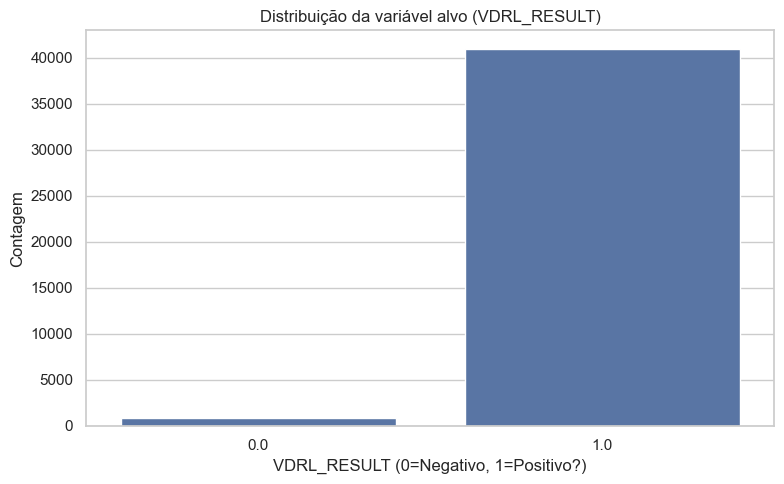

In [51]:
target_col = "VDRL_RESULT"

print("Contagem absoluta:")
print(df[target_col].value_counts())

print("\nProporção:")
print(df[target_col].value_counts(normalize=True))

sns.countplot(x=df[target_col])
plt.title("Distribuição da variável alvo (VDRL_RESULT)")
plt.xlabel("VDRL_RESULT (0=Negativo, 1=Positivo?)")
plt.ylabel("Contagem")

plt.tight_layout()
plt.savefig(REPORTS_DIR / "01_distribuicao_target_vdrl_result.png", dpi=300, bbox_inches="tight")  # NOVO

plt.show()


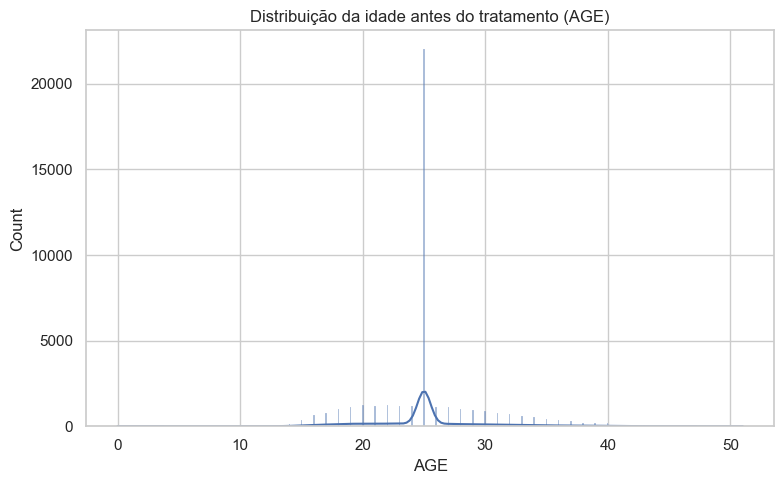

In [52]:
sns.histplot(df["AGE"], kde=True)
plt.title("Distribuição da idade antes do tratamento (AGE)")

plt.tight_layout()
plt.savefig(REPORTS_DIR / "02_hist_idade_AGE.png", dpi=300, bbox_inches="tight")  # NOVO

plt.show()


In [39]:
# Substituir idades negativas por NaN
df.loc[df["AGE"] < 0, "AGE"] = np.nan

print("Depois de corrigir negativos:")
print("Min:", df["AGE"].min(), " | Max:", df["AGE"].max())
print("Nulos em AGE:", df["AGE"].isna().sum())

# Preencher com a mediana
median_age = df["AGE"].median()
df["AGE"] = df["AGE"].fillna(median_age)

print("\nDepois de preencher com mediana:")
print("Min:", df["AGE"].min(), " | Max:", df["AGE"].max())
print("Nulos em AGE:", df["AGE"].isna().sum())


Depois de corrigir negativos:
Min: 0.0  | Max: 51.0
Nulos em AGE: 1

Depois de preencher com mediana:
Min: 0.0  | Max: 51.0
Nulos em AGE: 0


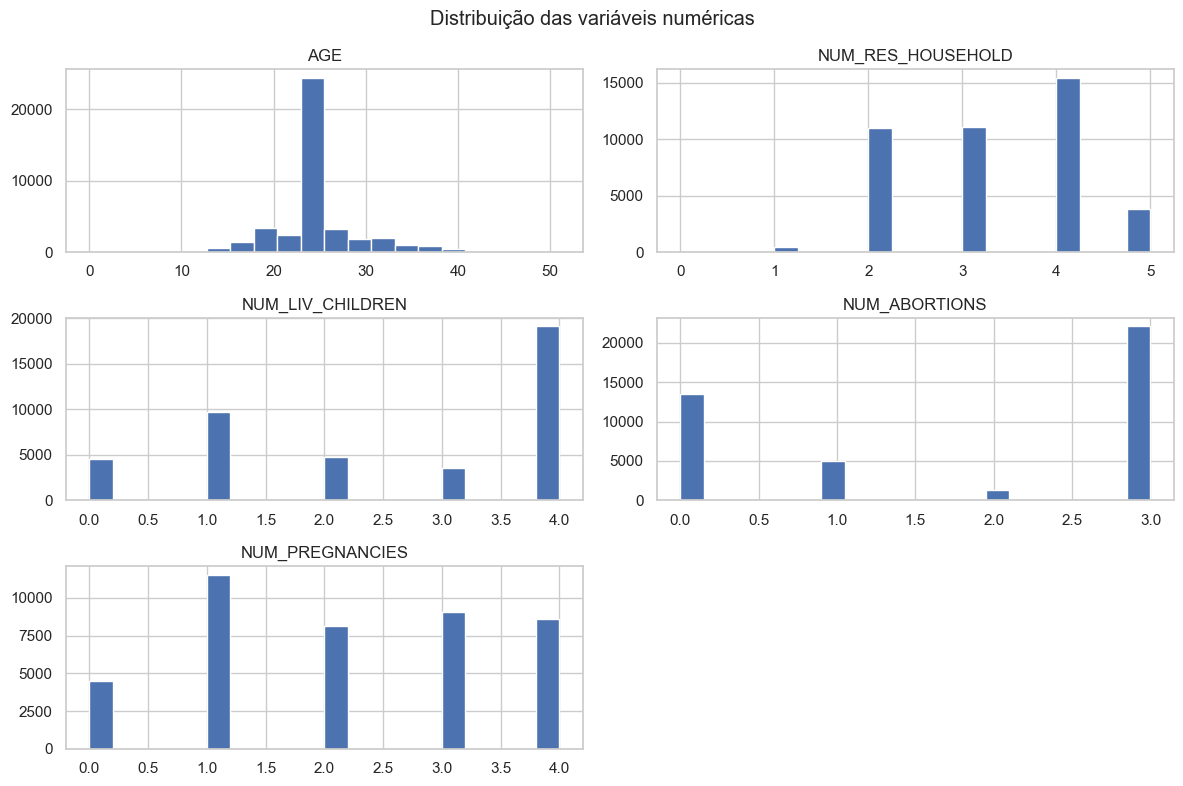

In [53]:
num_cols = ["AGE", "NUM_RES_HOUSEHOLD", "NUM_LIV_CHILDREN",
            "NUM_ABORTIONS", "NUM_PREGNANCIES"]

df[num_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle("Distribuição das variáveis numéricas")
plt.tight_layout()

plt.savefig(REPORTS_DIR / "03_hist_variaveis_numericas.png", dpi=300, bbox_inches="tight")  # NOVO

plt.show()



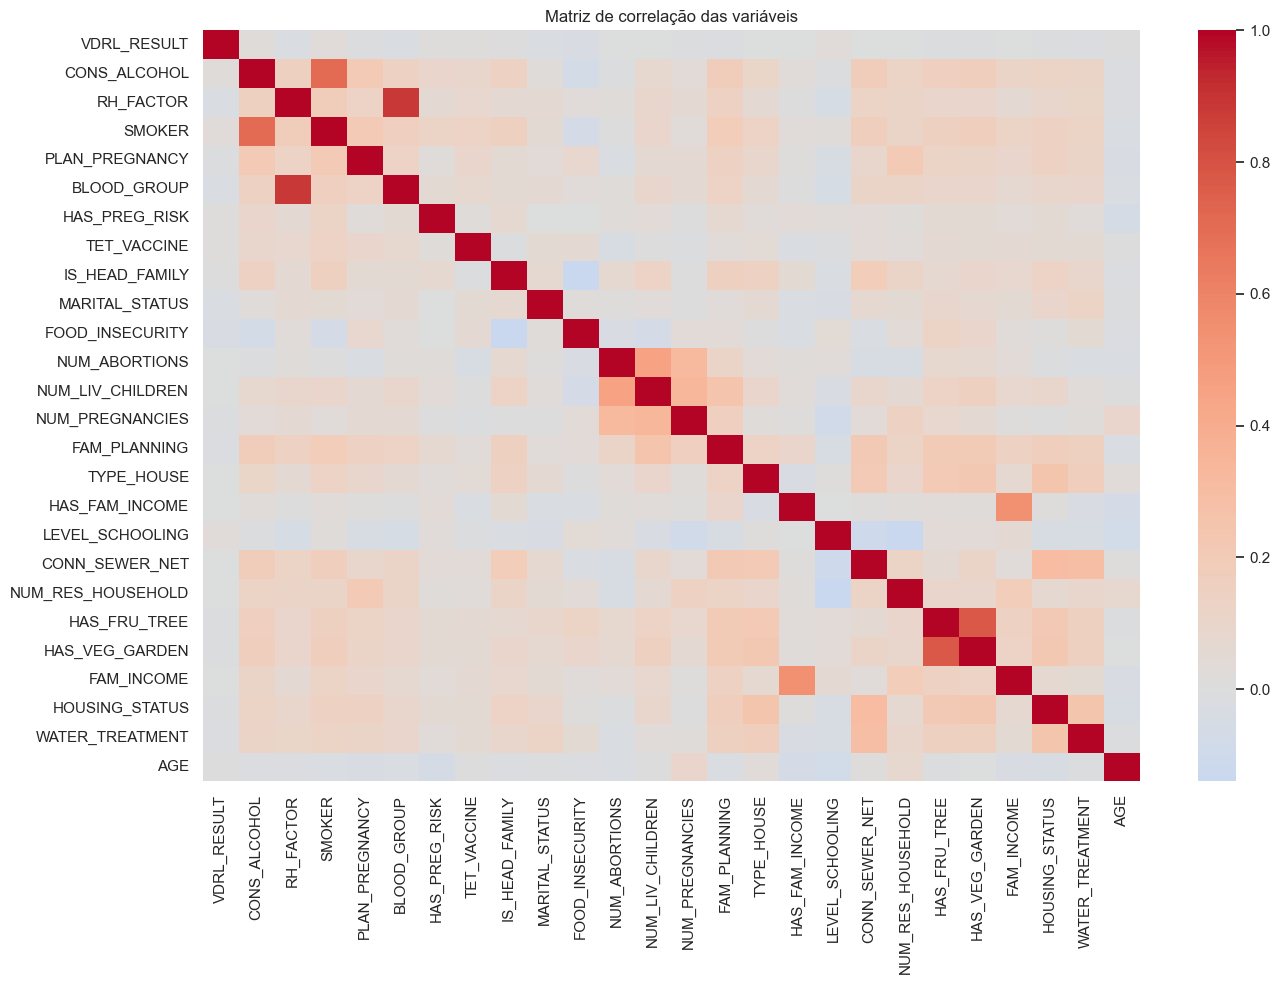

In [54]:
plt.figure(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matriz de correlação das variáveis")

plt.tight_layout()
plt.savefig(REPORTS_DIR / "04_matriz_correlacao.png", dpi=300, bbox_inches="tight")  # NOVO

plt.show()


In [42]:
target_col = "VDRL_RESULT"

X = df.drop(columns=[target_col])
y = df[target_col]

num_cols = ["AGE", "NUM_RES_HOUSEHOLD", "NUM_LIV_CHILDREN",
            "NUM_ABORTIONS", "NUM_PREGNANCIES"]

cat_cols = [c for c in X.columns if c not in num_cols]

print("Colunas numéricas:", num_cols)
print("Colunas categóricas:", cat_cols)


Colunas numéricas: ['AGE', 'NUM_RES_HOUSEHOLD', 'NUM_LIV_CHILDREN', 'NUM_ABORTIONS', 'NUM_PREGNANCIES']
Colunas categóricas: ['CONS_ALCOHOL', 'RH_FACTOR', 'SMOKER', 'PLAN_PREGNANCY', 'BLOOD_GROUP', 'HAS_PREG_RISK', 'TET_VACCINE', 'IS_HEAD_FAMILY', 'MARITAL_STATUS', 'FOOD_INSECURITY', 'FAM_PLANNING', 'TYPE_HOUSE', 'HAS_FAM_INCOME', 'LEVEL_SCHOOLING', 'CONN_SEWER_NET', 'HAS_FRU_TREE', 'HAS_VEG_GARDEN', 'FAM_INCOME', 'HOUSING_STATUS', 'WATER_TREATMENT']


In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Tamanho treino:", X_train.shape, " | Tamanho teste:", X_test.shape)
print("Distribuição y_train:")
print(y_train.value_counts(normalize=True))


Tamanho treino: (33409, 25)  | Tamanho teste: (8353, 25)
Distribuição y_train:
VDRL_RESULT
1.0    0.980215
0.0    0.019785
Name: proportion, dtype: float64


In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)
